# Importing Required Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import plotly.express as px

# Loading Datasets

In [13]:
orders = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\A1\olist_orders_dataset.csv")

In [7]:
payments= pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\ecommerce-order-funnel-conversion-analysis\olist_order_payments_dataset.csv")

In [8]:
items= pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\ecommerce-order-funnel-conversion-analysis\olist_order_items_dataset.csv")

In [9]:
customers = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\ecommerce-order-funnel-conversion-analysis\olist_customers_dataset.csv")

# Previewing The orders dataset

In [14]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# orders funnel - status-wise order count

In [15]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

# Data Type and missing value overview

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


# Converting data types

In [17]:
date_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_customer_date',
             'order_estimated_delivery_date','order_delivered_carrier_date']

In [18]:
for col in date_cols:
    orders[col]= pd.to_datetime(orders[col],errors='coerce')

# Verifying

In [101]:
 orders[date_cols].dtypes

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
dtype: object

# Checking duplicates

In [19]:
orders.duplicated().sum()

np.int64(0)

# Checking duplicate order_id

In [20]:
orders.duplicated(['order_id']).sum()

np.int64(0)

# Missing Values Check for orders

In [21]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

# Checking Missing Values for Delivered orders

In [22]:
delivered_orders= orders[orders['order_status']== 'delivered']

In [23]:
delivered_orders[
    [ 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']
].isna().sum()

order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
dtype: int64

# Previewing payments dataset

In [24]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# Data types and missing value overview for payments

In [51]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


# Dropping Duplicates

In [70]:
payments.drop_duplicates()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


# Previewing items dataset

In [52]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# Data Types and missing value overview for items

In [53]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


# Converting data types for items

In [59]:
 items['shipping_limit_date']= pd.to_datetime(items['shipping_limit_date'],errors ='coerce')

# Verifying

In [64]:
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

# Dropping Duplicates

In [68]:
items.drop_duplicates()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


# Previewing customers dataset

In [66]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# Data type and missing values overview for customers

In [50]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


# Dropping Duplicates

In [51]:
customers.drop_duplicates()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


# Defining funnel stages

In [25]:
funnel = {
    "Purchase": orders['order_id'].nunique(),

    "Approved": orders[
        orders['order_approved_at'].notna()
    ]['order_id'].nunique(),

    "Shipped": orders[
        orders['order_delivered_carrier_date'].notna()
    ]['order_id'].nunique(),

    "Delivered": orders[
        orders['order_delivered_customer_date'].notna()
    ]['order_id'].nunique()
}

funnel

{'Purchase': 99441, 'Approved': 99281, 'Shipped': 97658, 'Delivered': 96476}

# Conversion % 

In [26]:
funnel_df = pd.DataFrame(
    list(funnel.items()),
    columns=['Stage', 'Orders']
)

funnel_df['Conversion_%'] = (
    funnel_df['Orders'] / funnel_df['Orders'].shift(1)
) * 100

funnel_df

,Stage,Orders,Conversion_%
0,Purchase,99441,NaN
1,Approved,99281,99.839101
2,Shipped,97658,98.365246
3,Delivered,96476,98.789654


# Drop-off Analysis

In [47]:
funnel_df['Drop_%'] = 100 - funnel_df['Conversion_%']
funnel_df

,Stage,Orders,Drop_Orders,Conversion_%,Drop_%
0,Purchase,99441,NaN,NaN,NaN
1,Approved,99281,160.0,99.839101,0.160899
2,Shipped,97658,1623.0,98.365246,1.634754
3,Delivered,96476,1182.0,98.789654,1.210346


# Approval Time

In [28]:
orders['approval_time_hrs'] = (
    orders['order_approved_at'] -
    orders['order_purchase_timestamp']
).dt.total_seconds() / 3600

# Shipping Time

In [29]:
orders['shipping_time_hrs'] = (
    orders['order_delivered_carrier_date']
    - orders['order_approved_at']
).dt.total_seconds() / 3600

# Delivered Time

In [30]:
orders['delivery_time_hrs'] = (
    orders['order_delivered_customer_date']
    - orders['order_delivered_carrier_date']
).dt.total_seconds() / 3600

# Time between stages

In [31]:
orders[['approval_time_hrs',
        'shipping_time_hrs',
        'delivery_time_hrs']].describe()

,approval_time_hrs,shipping_time_hrs,delivery_time_hrs
count,99281.000000,97644.000000,96475.000000
mean,10.419094,67.320916,223.933126
std,26.038004,85.186249,210.242923
min,0.000000,-4109.256111,-386.308056
25%,0.215000,21.012222,98.398750
50%,0.343333,43.641528,170.394444
75%,14.580833,85.931250,288.698750
max,4509.180556,3018.301667,4924.583333


# Note: Negative time values were observed due to inconsistent or out-of-order timestamps.These records were retained to reflect real-world data quality issues.

# Saving Updated Dataset

In [116]:
orders.to_csv(r"C:\Users\adity\OneDrive\Desktop\ecommerce-order-funnel-conversion-analysis\orders.csv", index = False)

In [111]:
items.to_csv(r"C:\Users\adity\OneDrive\Desktop\ecommerce-order-funnel-conversion-analysis\items.csv", index = False)

In [113]:
customers.to_csv(r"C:\Users\adity\OneDrive\Desktop\ecommerce-order-funnel-conversion-analysis\customers.csv", index = False)

In [114]:
payments.to_csv(r"C:\Users\adity\OneDrive\Desktop\ecommerce-order-funnel-conversion-analysis\payments.csv", index = False)

# Q1. At which stage do maximum orders drop off?

In [32]:
funnel_df = pd.DataFrame(list(funnel.items()), columns=['Stage', 'Orders'])
funnel_df['Drop_Orders'] = funnel_df['Orders'].shift(1) - funnel_df['Orders']
funnel_df

,Stage,Orders,Drop_Orders
0,Purchase,99441,NaN
1,Approved,99281,160.0
2,Shipped,97658,1623.0
3,Delivered,96476,1182.0


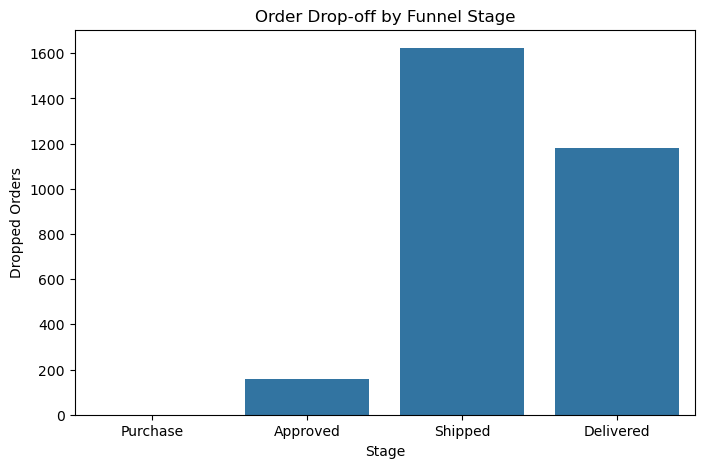

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stage', y='Drop_Orders', data=funnel_df)
plt.title("Order Drop-off by Funnel Stage")
plt.ylabel("Dropped Orders")
plt.show()

# Q2. What % of placed orders get delivered?

In [34]:
delivery_rate = (
    funnel['Delivered'] / funnel['Purchase']
) * 100

delivery_rate

97.01833247855512

# Q3. How does conversion change from order?

In [35]:
funnel_df['Conversion_%'] = (
    funnel_df['Orders'] / funnel_df['Orders'].shift(1)
) * 100

funnel_df

,Stage,Orders,Drop_Orders,Conversion_%
0,Purchase,99441,NaN,NaN
1,Approved,99281,160.0,99.839101
2,Shipped,97658,1623.0,98.365246
3,Delivered,96476,1182.0,98.789654


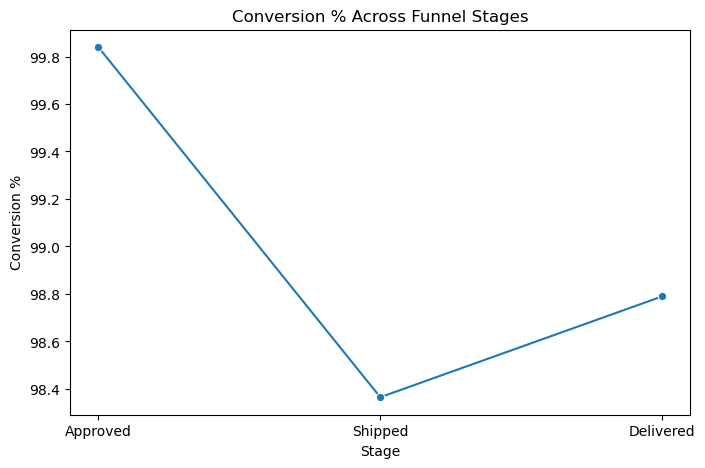

In [36]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Stage', y='Conversion_%', data=funnel_df, marker='o')
plt.title("Conversion % Across Funnel Stages")
plt.ylabel("Conversion %")
plt.show()

# Q4. Which payment method have highest & lowest delivery success?

In [37]:
payment_delivery = (
    payments.merge(orders[['order_id','order_delivered_customer_date']], on='order_id', how='left')
)

payment_summary = (
    payment_delivery
    .groupby('payment_type')
    .agg(
        total_orders=('order_id','nunique'),
        delivered_orders=('order_delivered_customer_date', lambda x: x.notna().sum())
    )
)

payment_summary['delivery_rate_%'] = (
    payment_summary['delivered_orders'] / payment_summary['total_orders']
) * 100

payment_summary.sort_values('delivery_rate_%', ascending=False)

,total_orders,delivered_orders,delivery_rate_%
payment_type,,,
voucher,3866,5493,142.084842
credit_card,76505,74585,97.490360
debit_card,1528,1485,97.185864
boleto,19784,19191,97.002628
not_defined,3,0,0.000000


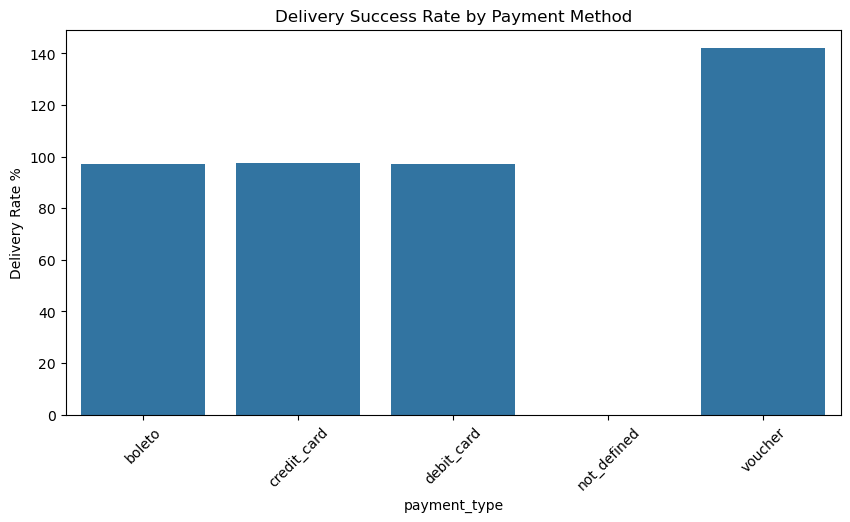

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=payment_summary.index,
    y=payment_summary['delivery_rate_%']
)
plt.title("Delivery Success Rate by Payment Method")
plt.ylabel("Delivery Rate %")
plt.xticks(rotation=45)
plt.show()

# Q5. How does delayed delivery impact cancellations/completions?

In [39]:
orders['is_delayed'] = (
    orders['order_delivered_customer_date'] >
    orders['order_estimated_delivery_date']
)

delay_impact = (
    orders
    .groupby(['is_delayed','order_status'])
    .size()
    .reset_index(name='count')
)

delay_impact

,is_delayed,order_status,count
0,False,approved,2
1,False,canceled,624
2,False,created,5
3,False,delivered,88652
4,False,invoiced,314
5,False,processing,301
6,False,shipped,1107
7,False,unavailable,609
8,True,canceled,1
9,True,delivered,7826


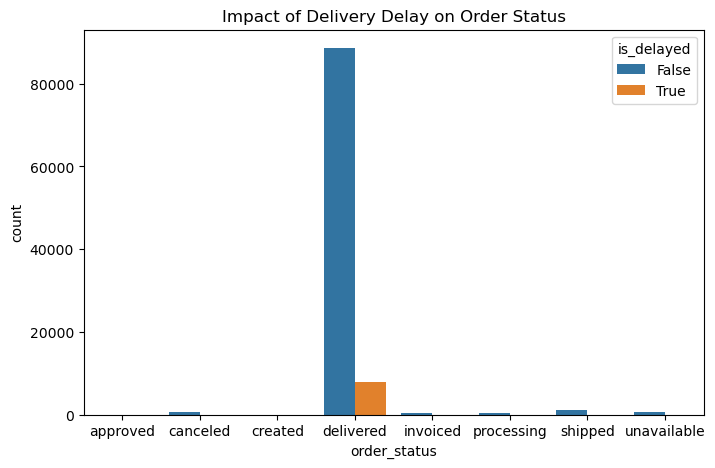

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='order_status',
    y='count',
    hue='is_delayed',
    data=delay_impact
)
plt.title("Impact of Delivery Delay on Order Status")
plt.show()

# Q6. How much revenue is lost due to cancellations & failures?

In [43]:
revenue = (
    payments.merge(
        orders[['order_id','order_status']],
        on='order_id',
        how='left'
    )
)

lost_revenue = revenue[
    revenue['order_status'].isin(['canceled','unavailable'])
]['payment_value'].sum()

total_revenue = revenue['payment_value'].sum()

lost_revenue, (lost_revenue / total_revenue) * 100
print(f"Lost Revenue: ₹{lost_revenue:,.2f}")
print(f"Revenue Loss %: {(lost_revenue / total_revenue) * 100:.2f}%")

Lost Revenue: ₹269,735.11
Revenue Loss %: 1.68%


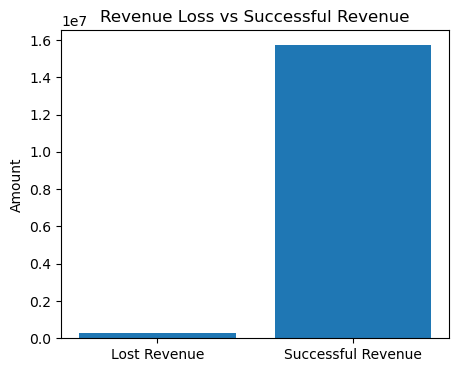

In [45]:
plt.figure(figsize=(5,4))
plt.bar(['Lost Revenue', 'Successful Revenue'],
        [lost_revenue, total_revenue - lost_revenue])
plt.title('Revenue Loss vs Successful Revenue')
plt.ylabel('Amount')
plt.show()

# Q7. Which funnel stage should be optimized first?

In [50]:
q7_df = funnel_df.copy()
q7_df = q7_df[q7_df['Drop_%'].notna()]

q7_df[['Stage', 'Drop_Orders', 'Drop_%']]
q7_df.loc[q7_df['Drop_%'].idxmax()]

Stage             Shipped
Orders              97658
Drop_Orders        1623.0
Conversion_%    98.365246
Drop_%           1.634754
Name: 2, dtype: object

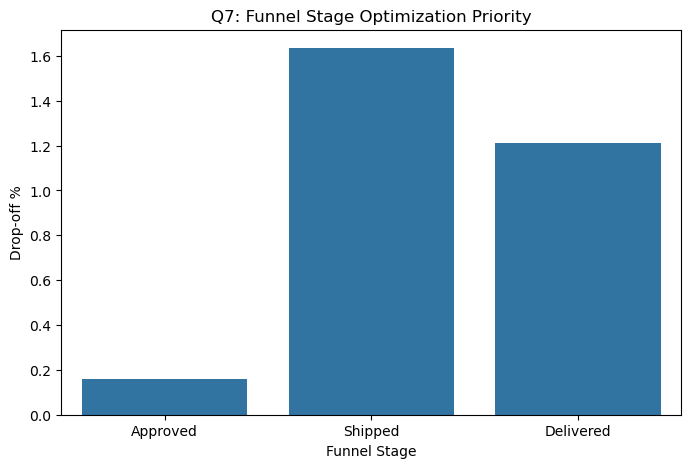

In [51]:
plt.figure(figsize=(8,5))

sns.barplot(
    x='Stage',
    y='Drop_%',
    data=q7_df
)

plt.title('Q7: Funnel Stage Optimization Priority')
plt.xlabel('Funnel Stage')
plt.ylabel('Drop-off %')

plt.show()